In [1]:
import pickle
import numpy as np

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')  # Use 'bytes' for compatibility with Python 3
    return dict


In [3]:
# Load a single batch
batch = unpickle('data_batch_1')

# Access the data and labels
data = batch[b'data']  # Note the use of b'...' for keys due to byte encoding
labels = batch[b'labels']

# Print the shape of the data
print("Data shape:", data.shape)  # Should be (10000, 3072)
print("Labels length:", len(labels))  # Should be 10000


Data shape: (10000, 3072)
Labels length: 10000


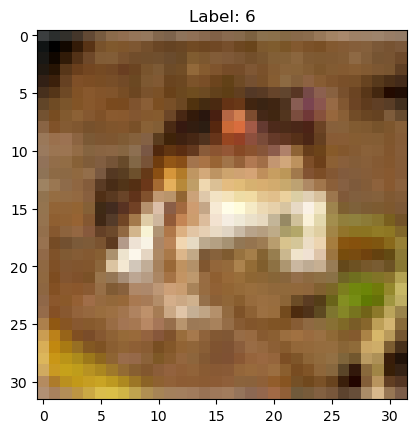

In [4]:
import matplotlib.pyplot as plt

# Reshape the first image
image = data[0].reshape(3, 32, 32).transpose(1, 2, 0)  # Rearrange dimensions to (32, 32, 3)

# Plot the image
plt.imshow(image)
plt.title(f"Label: {labels[0]}")
plt.show()


In [5]:
meta = unpickle('batches.meta')
label_names = meta[b'label_names']

# Decode byte labels to strings
label_names = [name.decode('utf-8') for name in label_names]
print("Label names:", label_names)


Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
# Initialize arrays for all data and labels
all_data = []
all_labels = []

# Load all data batches
for i in range(1, 6):
    batch = unpickle(f'data_batch_{i}')
    all_data.append(batch[b'data'])
    all_labels.extend(batch[b'labels'])

# Stack data into a single array
all_data = np.vstack(all_data)
all_labels = np.array(all_labels)

print("Combined data shape:", all_data.shape)  # Should be (50000, 3072)
print("Combined labels shape:", all_labels.shape)  # Should be (50000,)


Combined data shape: (50000, 3072)
Combined labels shape: (50000,)


In [7]:
test_batch = unpickle('test_batch')
test_data = test_batch[b'data']
test_labels = np.array(test_batch[b'labels'])

print("Test data shape:", test_data.shape)  # Should be (10000, 3072)
print("Test labels shape:", test_labels.shape)  # Should be (10000,)


Test data shape: (10000, 3072)
Test labels shape: (10000,)
